In [1]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h1>Ordenamiento por inserción</h1>

In [25]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [26]:
B = np.random.permutation(range(0,10))
print (B)
insertion_sort(B)
print (B)

[7 4 0 3 8 1 6 5 2 9]
[0 1 2 3 4 5 6 7 8 9]


<h2>Correctitud</h2>
<b>Invariante:</b> Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.

In [27]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [28]:
print (invariant([1, 2, 3, 4], [4, 3, 2, 1]))
print (invariant([1, 2, 3, 4], [5, 3, 2, 1]))

True
False


Algoritmo de ordenamiento por inserción incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [29]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [30]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print (B)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [31]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print ("Error en el invariante de ciclo!")
        print ("j=", j)
        print ("i=", i)
        print ("A=", A)
        print ("Original A=", original_A)

In [32]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_insertion_sort(B)

Error en el invariante de ciclo!
j= 2
i= 0
A= [5, 4, 6, 3, 7, 2, 8, 1, 9]
Original A= [5, 4, 6, 3, 7, 2, 8, 1, 9]


<h2>Análisis del tiempo de ejecución</h2>

In [33]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print ("Number of steps =", self.steps)
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()

In [34]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()

Number of steps = 125


<b>Análisis experimental</b><br>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos. 

In [35]:
import random

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = list(range(i))
        random.shuffle(l)
        acct.reset()
        acct_insertion_sort(l, acct)
        results.append(acct.steps)
    return results

In [36]:
print (exper_analysis(10))

[2, 2, 8, 20, 32, 41, 56, 65, 110, 113]


Ahora vamos a analizar el tiempo del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y saca el tiempo que se demora el algoritmo.

In [37]:
import time
tic = time.clock()#get start time
toc = time.clock()#get final time
def timer_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = list(range(i))
        random.shuffle(l)
        acct.reset()
        tic = time.clock()
        acct_insertion_sort(l, acct)
        toc = time.clock()
        results.append((toc-tic))
    return results

La siguiente gráfica representa el <font color="blue">número de operaciones</font>, <font color="red">tiempo</font> y <b>T(n)</b> que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (varie n) en el peor de los casos.

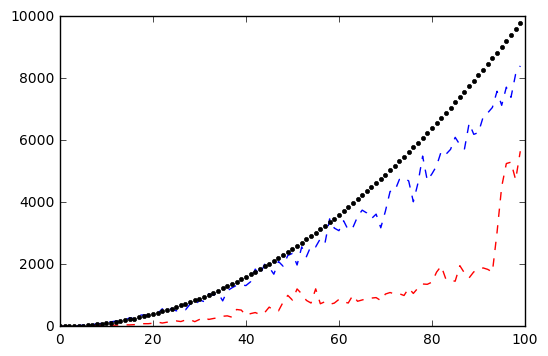

In [24]:
import pylab 
import math
pylab.clf()
x = np.arange(100)
y = np.array(timer_analysis(100))*800000

a = np.arange(100)
b = np.array(exper_analysis(100))

c = np.arange(100)
d = (c*c)

pylab.plot(x, y, 'r--',a,b,'b--',c,d,'k.')
pylab.show()